# Formula 1 analizė 1950 - 2021

![](https://1000logos.net/wp-content/uploads/2021/06/F1-logo.png)

# Hipotezės

1. Micheal Schumacher yra geriausias F1 vairutojas
2. Į 10 geriausių kvalifikacijoje pasirodžiusių vairuotojų įeina, Max Verstappen
3. Daugiausiai kartų varžybos yra vykusios Italijoje
4. Greičiausiai apvažiuotas ratas priklauso Sir Lewis Hamilton
5. Daugiausiai laimėjimų turi Ferrari komanda
6. Daugiausiai 1-3 vietų laimėjimų turi Mclearn komanda

# Lentelės

In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

[I 09:27:41 InstallContribNbextensionsApp] jupyter contrib nbextension install 
[I 09:27:41 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 09:27:41 InstallContribNbextensionsApp] Installing C:\Users\simon\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\addbefore\addbefore.yaml
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\addbefore\icon.png
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\addbefore\main.js
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\addbefore\readme.md
[I 09:27:41 InstallContribNbextensionsApp] - Validating: ok
[I 09:27:41 InstallContribNbextensionsApp] Installing C:\Users\simon\anaconda3\lib\site-packages\jupyter_contrib_nbextensions

[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\autopep8.js
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\autopep8.yaml
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\code_prettify.js
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\code_prettify.yaml
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\demo-jv.gif
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\demo-py.gif
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\demo-R.gif
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\demo_2to3.gif
[I 09:27:41 InstallContribNbextensionsApp] Up to 

[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\runtools\gutter.css
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\runtools\icon.png
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\runtools\main.css
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\runtools\main.js
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\runtools\readme.md
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\runtools\runtools.yaml
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\runtools\runtools_execute.png
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\runtools\runtools_lock.png
[I 09:27:41 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\runtools\

In [2]:
pip install mysql.connector

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mysql.connector
import pandas as pd
mydb = mysql.connector.connect(
    host="localhost",
    port="3317",
    user="root",
    password="Gilinisaldainis8?",
)
cursor = mydb.cursor()
cursor.execute('USE formula 1')
cursor.execute('SELECT * FROM circuits')
table_rows = cursor.fetchall()
df = pd.DataFrame(table_rows)
df

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '1' at line 1

In [13]:
results = pd.read_csv('C:\\Users\\simon\\F1\\results.csv')
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25400,1073,815,9,11,4,15,15,15,0.0,55,\N,\N,51,2,1:26.419,219.993,5
25395,25401,1073,849,3,6,16,\N,R,16,0.0,50,\N,\N,30,15,1:29.293,212.912,3
25396,25402,1073,841,51,99,14,\N,R,17,0.0,33,\N,\N,33,16,1:29.442,212.557,6
25397,25403,1073,847,3,63,17,\N,R,18,0.0,26,\N,\N,23,19,1:30.647,209.732,6


In [14]:
circuits = pd.read_csv('C:\\Users\\simon\\F1\\circuits.csv')
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
76,77,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.54330,39.17280,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


In [15]:
cons_res = pd.read_csv('C:\\Users\\simon\\F1\\constructor_results.csv')
cons_res

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
11945,16445,1073,214,6.0,\N
11946,16446,1073,117,0.0,\N
11947,16447,1073,210,0.0,\N
11948,16448,1073,3,0.0,\N


In [16]:
cons_standings = pd.read_csv('C:\\Users\\simon\\F1\\constructor_standings.csv')
cons_standings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
12711,27938,1074,210,0.0,6,-,0
12712,27939,1074,1,0.0,7,-,0
12713,27940,1074,131,0.0,8,-,0
12714,27941,1074,9,0.0,9,-,0


In [17]:
constructors = pd.read_csv('C:\\Users\\simon\\F1\\constructors.csv')
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [18]:
driver_standings = pd.read_csv('C:\\Users\\simon\\F1\\driver_standings.csv')
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33389,70776,1074,840,0.0,16,-,0
33390,70777,1074,852,0.0,17,-,0
33391,70778,1074,830,0.0,18,-,0
33392,70779,1074,20,0.0,19,-,0


In [19]:
drivers = pd.read_csv('C:\\Users\\simon\\F1\\drivers.csv')
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


In [20]:
lap_times = pd.read_csv('C:\\Users\\simon\\F1\\lap_times.csv')
lap_times

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
514587,1073,847,22,15,1:30.821,90821
514588,1073,847,23,15,1:30.647,90647
514589,1073,847,24,14,1:31.577,91577
514590,1073,847,25,16,1:32.794,92794


In [21]:
pit_stops = pd.read_csv('C:\\Users\\simon\\F1\\pit_stops.csv')
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8823,1073,840,2,52,18:22:55,22.661,22661
8824,1073,815,3,53,18:23:09,21.385,21385
8825,1073,854,2,52,18:23:42,22.070,22070
8826,1073,852,2,53,18:24:01,21.909,21909


In [22]:
qualy = pd.read_csv('C:\\Users\\simon\\F1\\qualifying.csv')
qualy

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9130,9171,1073,849,3,6,16,1:24.338,\N,\N
9131,9172,1073,847,3,63,17,1:24.423,\N,\N
9132,9173,1073,8,51,7,18,1:24.779,\N,\N
9133,9174,1073,854,210,47,19,1:24.906,\N,\N


In [23]:
races = pd.read_csv('C:\\Users\\simon\\F1\\races.csv')
races

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1075,1092,2022,19,22,Japanese Grand Prix,2022-10-09,05:10:00,https://en.wikipedia.org/wiki/2022_Japanese_Gr...
1076,1093,2022,20,69,United States Grand Prix,2022-10-23,19:00:00,https://en.wikipedia.org/wiki/2022_United_Stat...
1077,1094,2022,21,32,Mexico City Grand Prix,2022-10-30,19:00:00,https://en.wikipedia.org/wiki/2022_Mexican_Gra...
1078,1095,2022,22,18,São Paulo Grand Prix,2022-11-13,17:00:00,https://en.wikipedia.org/wiki/2022_S%C3%A3o_Pa...


In [24]:
results = pd.read_csv('C:\\Users\\simon\\F1\\results.csv')
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25400,1073,815,9,11,4,15,15,15,0.0,55,\N,\N,51,2,1:26.419,219.993,5
25395,25401,1073,849,3,6,16,\N,R,16,0.0,50,\N,\N,30,15,1:29.293,212.912,3
25396,25402,1073,841,51,99,14,\N,R,17,0.0,33,\N,\N,33,16,1:29.442,212.557,6
25397,25403,1073,847,3,63,17,\N,R,18,0.0,26,\N,\N,23,19,1:30.647,209.732,6


In [25]:
seasons = pd.read_csv('C:\\Users\\simon\\F1\\seasons.csv')
seasons

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...
...,...,...
68,2018,https://en.wikipedia.org/wiki/2018_Formula_One...
69,2019,https://en.wikipedia.org/wiki/2019_Formula_One...
70,2020,https://en.wikipedia.org/wiki/2020_Formula_One...
71,2021,https://en.wikipedia.org/wiki/2021_Formula_One...


In [26]:
status = pd.read_csv('C:\\Users\\simon\\F1\\status.csv')
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
132,135,Brake duct
133,136,Seat
134,137,Damage
135,138,Debris


# Analizė

## Micheal Schumacher yra geriausias F1 vairutojas

![](https://i.pinimg.com/originals/5b/b6/d6/5bb6d6799ae279fd45d021e9324f8d9c.png)

In [141]:
results = pd.read_csv('C:\\Users\\simon\\F1\\results.csv')
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25400,1073,815,9,11,4,15,15,15,0.0,55,\N,\N,51,2,1:26.419,219.993,5
25395,25401,1073,849,3,6,16,\N,R,16,0.0,50,\N,\N,30,15,1:29.293,212.912,3
25396,25402,1073,841,51,99,14,\N,R,17,0.0,33,\N,\N,33,16,1:29.442,212.557,6
25397,25403,1073,847,3,63,17,\N,R,18,0.0,26,\N,\N,23,19,1:30.647,209.732,6


In [27]:
laimi = results[results['positionText']=='1'].groupby('driverId')['positionText'].count().sort_values()
laimi

driverId
386      1
525      1
628      1
255      1
611      1
      ... 
102     41
117     51
20      53
30      91
1      103
Name: positionText, Length: 111, dtype: int64

In [28]:
grid = results[results['grid']==1].groupby('driverId')['grid'].count().sort_values()
grid

driverId
846      1
654      1
123      1
152      1
633      1
      ... 
373     34
20      57
102     65
30      68
1      103
Name: grid, Length: 107, dtype: int64

In [29]:
lenk_sk = results[['raceId', 'driverId']].groupby('driverId')['raceId'].count().sort_values()
lenk_sk

driverId
378      1
443      1
426      1
422      1
421      1
      ... 
30     308
18     309
22     326
4      336
8      352
Name: raceId, Length: 853, dtype: int64

In [34]:
proc_1 = (laimi / lenk_sk) * 100
proc_1.dropna(how='any').sort_values(ascending=False)

driverId
766    50.000000
579    41.379310
657    40.000000
647    36.111111
1      35.763889
         ...    
5       0.892857
200     0.877193
44      0.632911
55      0.495050
15      0.390625
Length: 111, dtype: float64

In [35]:
proc_1.iloc[29]

29.545454545454547

In [73]:
proc_1.iloc[0]

35.76388888888889

In [36]:
proc_2 = grid / lenk_sk * 100
proc_2.dropna(how='any').sort_values(ascending=False)

driverId
579    50.000000
373    46.575342
102    40.123457
647    38.888889
1      35.763889
         ...    
304     0.892857
123     0.609756
807     0.549451
2       0.543478
110     0.467290
Length: 107, dtype: float64

In [37]:
proc_2.iloc[29]

22.07792207792208

In [74]:
proc_2.iloc[0]

35.76388888888889

In [54]:
print(f'Pagal duombazės duomenis Micheal Schumacher dalyvavo {lenk_sk[30]} varžybose, iš kurių laimėjo {laimi[30]}, o pradėjo varžybas pirmoje pozicijoje {grid[30]} kartus. Tai kiek varžybų dalyvavo ir kiek jų laimėjo  procentaliai jo efektivumas yra {proc_1[30]}. Lygininat kvalifikacijos ir lenktynių pozicijas, procentaliai efektivumas yra {proc_2[30]}.')

Pagal duombazės duomenis Micheal Schumacher dalyvavo 308 varžybose, iš kurių laimėjo 91, o pradėjo varžybas pirmoje pozicijoje 68 kartus. Tai kiek varžybų dalyvavo ir kiek jų laimėjo  procentaliai jo efektivumas yra 29.545454545454547. Lygininat kvalifikacijos ir lenktynių pozicijas, procentaliai efektivumas yra 22.07792207792208.


In [60]:
print(f'Lygininat M.Schumacher su kitu 7 kartus pasaulio čempionu L. Hamiltonu, mes matome, kad jisai dalyvavo {lenk_sk[1]} varžybose, iš kurių laimėjo {laimi[1]}, procentaliai jo efektyvumas yra {proc_1[1]}. Kalbant apie kvalifikaciją, Hamiltonas iškovojo {grid[1]} kartus pirmąją vietą ir jo efektyvumas procentaliai yra {proc_2[1]}')

Lygininat M.Schumacher su kitu 7 kartus pasaulio čempionu L. Hamiltonu, mes matome, kad jisai dalyvavo 288 varžybose, iš kurių laimėjo 103, procentaliai jo efektyvumas yra 35.76388888888889. Kalbant apie kvalifikaciją, Hamiltonas iškovojo 103 kartus pirmąją vietą ir jo efektyvumas procentaliai yra 35.76388888888889


In [147]:
df = pd.DataFrame({'M.Schumacher': [7, 308, 91, 68, 29.55, 22.08], 'L.Hamilton': [7, 288, 103, 103, 35.76, 35.76], 'Skirtumas':[0, 20, 12, 35, 6.21, 13.68]}, index=['Laimėti čempionatai', 'Viso važiuotu varžybų', 'Viso laimėtu varžybu', 'Kvalifikacija P1', 'Proc. Varžybos vs laimėjimų sk.', 'Proc. Kvalifikacija vs varžybų sk.'])
df

,M.Schumacher,L.Hamilton,Skirtumas
Laimėti čempionatai,7.00,7.00,0.00
Viso važiuotu varžybų,308.00,288.00,20.00
Viso laimėtu varžybu,91.00,103.00,12.00
Kvalifikacija P1,68.00,103.00,35.00
Proc. Varžybos vs laimėjimų sk.,29.55,35.76,6.21
Proc. Kvalifikacija vs varžybų sk.,22.08,35.76,13.68


In [150]:
df = pd.DataFrame({'M.Schumacher': [7, 308, 91, 68, 29.55, 22.08], 'L.Hamilton': [7, 288, 103, 103, 35.76, 35.76]}, index=['Laimėti čempionatai', 'Viso važiuotu varžybų', 'Viso laimėtu varžybu', 'Kvalifikacija P1', 'Proc. Varžybos vs laimėjimų sk.', 'Proc. Kvalifikacija vs varžybų sk.'])
df 

,M.Schumacher,L.Hamilton
Laimėti čempionatai,7.00,7.00
Viso važiuotu varžybų,308.00,288.00
Viso laimėtu varžybu,91.00,103.00
Kvalifikacija P1,68.00,103.00
Proc. Varžybos vs laimėjimų sk.,29.55,35.76
Proc. Kvalifikacija vs varžybų sk.,22.08,35.76


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, 'Proc. Kvalifikacija vs varžybų sk.'),
  Text(0.0, 0, 'Laimėti čempionatai'),
  Text(1.0, 0, 'Viso važiuotu varžybų'),
  Text(2.0, 0, 'Viso laimėtu varžybu'),
  Text(3.0, 0, 'Kvalifikacija P1'),
  Text(4.0, 0, 'Proc. Varžybos vs laimėjimų sk.'),
  Text(5.0, 0, 'Proc. Kvalifikacija vs varžybų sk.'),
  Text(6.0, 0, '')])

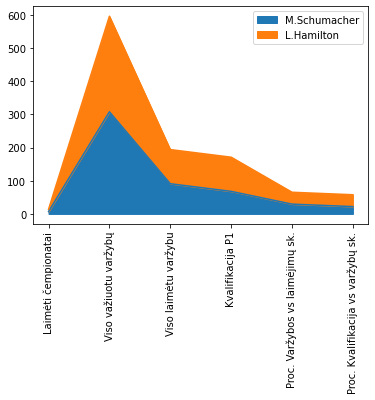

In [151]:
df.plot.area()
plt.xticks(rotation ='vertical')

In [75]:
drivers.iloc[29]

driverId                                                    30
driverRef                                   michael_schumacher
number                                                      \N
code                                                       MSC
forename                                               Michael
surname                                             Schumacher
dob                                                 1969-01-03
nationality                                             German
url            http://en.wikipedia.org/wiki/Michael_Schumacher
Name: 29, dtype: object

In [97]:
drivers.iloc[0]

driverId                                                 1
driverRef                                         hamilton
number                                                  44
code                                                   HAM
forename                                             Lewis
surname                                           Hamilton
dob                                             1985-01-07
nationality                                        British
url            http://en.wikipedia.org/wiki/Lewis_Hamilton
Name: 0, dtype: object

In [42]:
drivers[drivers['surname'] == 'Schumacher']

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
22,23,ralf_schumacher,\N,SCH,Ralf,Schumacher,1975-06-30,German,http://en.wikipedia.org/wiki/Ralf_Schumacher
29,30,michael_schumacher,\N,MSC,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


In [98]:
drivers[drivers['surname'] == 'Hamilton']

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
708,708,duncan_hamilton,\N,\N,Duncan,Hamilton,1920-04-30,British,http://en.wikipedia.org/wiki/Duncan_Hamilton_(...


## Į 10 geriausių kvalifikacijoje pasirodžiusių vairuotojų įeina, Max Verstappen

![](https://i0.wp.com/www.mostlyf1.com/wp-content/uploads/2021/03/Max-Verstappen-2021.png?ssl=1)

In [212]:
qualy = pd.read_csv('C:\\Users\\simon\\F1\\qualifying.csv')
qualy

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9130,9171,1073,849,3,6,16,1:24.338,\N,\N
9131,9172,1073,847,3,63,17,1:24.423,\N,\N
9132,9173,1073,8,51,7,18,1:24.779,\N,\N
9133,9174,1073,854,210,47,19,1:24.906,\N,\N


In [99]:
qualy[['driverId', 'position']].groupby('driverId')['position'].mean().sort_values(ascending=True).head(10)


driverId
102    1.000000
1      3.350694
95     4.833333
71     5.372881
830    5.638298
822    5.648045
20     5.666667
30     5.666667
77     5.760870
31     6.031250
Name: position, dtype: float64

In [208]:
drivers.iloc[[101, 0, 94, 70, 829, 821, 19, 29, 76, 30]]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
101,102,senna,\N,\N,Ayrton,Senna,1960-03-21,Brazilian,http://en.wikipedia.org/wiki/Ayrton_Senna
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
94,95,mansell,\N,\N,Nigel,Mansell,1953-08-08,British,http://en.wikipedia.org/wiki/Nigel_Mansell
70,71,damon_hill,\N,\N,Damon,Hill,1960-09-17,British,http://en.wikipedia.org/wiki/Damon_Hill
829,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen
821,822,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas
19,20,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
29,30,michael_schumacher,\N,MSC,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher
76,77,berger,\N,\N,Gerhard,Berger,1959-08-27,Austrian,http://en.wikipedia.org/wiki/Gerhard_Berger
30,31,montoya,\N,MON,Juan,Pablo Montoya,1975-09-20,Colombian,http://en.wikipedia.org/wiki/Juan_Pablo_Montoya


10 blogiausiai kvalifikavusių vairuotojų:

In [173]:
qualy[['driverId', 'position']].groupby('driverId')['position'].mean().sort_values(ascending=True).tail(10)


driverId
812    23.181818
93     23.285714
115    23.333333
86     23.750000
101    24.333333
98     24.333333
113    25.500000
111    25.714286
107    26.000000
108    26.500000
Name: position, dtype: float64

In [209]:
drivers.iloc[[811, 92, 114, 85, 100, 97, 112, 110, 106, 107]]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
811,812,chandhok,\N,CHA,Karun,Chandhok,1984-01-19,Indian,http://en.wikipedia.org/wiki/Karun_Chandhok
92,93,schiattarella,\N,\N,Domenico,Schiattarella,1967-11-17,Italian,http://en.wikipedia.org/wiki/Domenico_Schiatta...
114,115,noda,\N,\N,Hideki,Noda,1969-03-07,Japanese,http://en.wikipedia.org/wiki/Hideki_Noda
85,86,lavaggi,\N,\N,Giovanni,Lavaggi,1958-02-18,Italian,http://en.wikipedia.org/wiki/Giovanni_Lavaggi
100,101,brabham,\N,\N,David,Brabham,1965-09-05,Australian,http://en.wikipedia.org/wiki/David_Brabham
97,98,deletraz,\N,\N,Jean-Denis,Délétraz,1963-10-01,Swiss,http://en.wikipedia.org/wiki/Jean-Denis_Deletraz
112,113,adams,\N,\N,Philippe,Adams,1969-11-19,Belgian,http://en.wikipedia.org/wiki/Philippe_Adams
110,111,gounon,\N,\N,Jean-Marc,Gounon,1963-01-01,French,http://en.wikipedia.org/wiki/Jean-Marc_Gounon
106,107,ratzenberger,\N,\N,Roland,Ratzenberger,1960-07-04,Austrian,http://en.wikipedia.org/wiki/Roland_Ratzenberger
107,108,belmondo,\N,\N,Paul,Belmondo,1963-04-23,French,http://en.wikipedia.org/wiki/Paul_Belmondo


In [184]:
qualy[['driverId', 'position']].groupby('driverId')['position'].mean().sort_values(ascending=True)

driverId
102     1.000000
1       3.350694
95      4.833333
71      5.372881
830     5.638298
         ...    
98     24.333333
113    25.500000
111    25.714286
107    26.000000
108    26.500000
Name: position, Length: 164, dtype: float64

## Daugiausiai kartų varžybos yra vykusios Italijoje

![](https://www.formula1.com/content/dam/fom-website/2018-redesign-assets/Circuit%20maps%2016x9/Italy_Circuit.png.transform/9col/image.png)

In [28]:
races['name'].value_counts()

British Grand Prix               73
Italian Grand Prix               73
Monaco Grand Prix                68
Belgian Grand Prix               67
German Grand Prix                64
French Grand Prix                62
Spanish Grand Prix               52
Canadian Grand Prix              51
Brazilian Grand Prix             47
United States Grand Prix         43
Hungarian Grand Prix             37
Australian Grand Prix            36
Japanese Grand Prix              36
Austrian Grand Prix              35
Dutch Grand Prix                 32
San Marino Grand Prix            26
South African Grand Prix         23
European Grand Prix              23
Argentine Grand Prix             20
Mexican Grand Prix               20
Malaysian Grand Prix             19
Bahrain Grand Prix               18
Portuguese Grand Prix            18
Chinese Grand Prix               16
Abu Dhabi Grand Prix             14
Singapore Grand Prix             13
Indianapolis 500                 11
Turkish Grand Prix          

<AxesSubplot:>

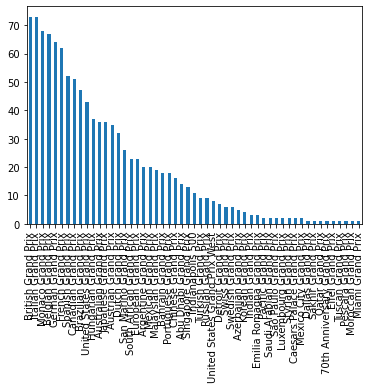

In [27]:
races['name'].value_counts().plot.bar()

## Greičiausiai apvažiuotas ratas priklauso Sir Lewis Hamilton

![](https://www.racetechmag.com/wp-content/uploads/2020/12/Lewis-Hamilton-F1-image.png)

In [102]:
results[['fastestLapTime', 'driverId', 'raceId']].sort_values('fastestLapTime')

,fastestLapTime,driverId,raceId
24928,0:55.404,847,1046
24927,0:56.563,822,1046
24920,0:56.789,815,1046
24932,0:56.887,841,1046
24931,0:56.905,20,1046
...,...,...,...
10781,\N,158,456
10780,\N,197,456
10779,\N,173,456
10787,\N,95,456


In [33]:
races[['raceId', 'name', 'date']].iloc[1033]

raceId                 1046
name      Sakhir Grand Prix
date             2020-12-06
Name: 1033, dtype: object

In [42]:
drivers[['driverId', 'forename', 'surname']].iloc[845]

driverId        847
forename     George
surname     Russell
Name: 845, dtype: object

## Daugiausiai laimėjimų turi Ferrari komanda

![](https://www.pngplay.com/wp-content/uploads/13/F1-Ferrari-No-Background.png)

In [91]:
cons_standings = pd.read_csv('C:\\Users\\simon\\F1\\constructor_standings.csv')
cons_standings.sort_values('position',ascending=False)

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
9926,19934,728,173,0.0,22,22,0
10078,23145,575,74,0.0,21,21,0
7231,23427,559,69,0.0,21,21,0
9090,19935,728,179,0.0,21,21,0
4114,8948,364,44,0.0,20,20,0
...,...,...,...,...,...,...,...
8235,22018,631,32,61.0,1,1,5
8223,22006,630,32,61.0,1,1,5
8211,21994,629,32,61.0,1,1,5
8199,21982,628,32,52.0,1,1,4


In [263]:
cons_standings[cons_standings['position'] == 1].groupby('constructorId')['positionText'].count().sort_values(ascending=False)

constructorId
6      229
1      165
131    145
3      114
9       69
4       46
32      44
22      29
172     23
170     20
23      17
25      16
191     16
66      14
180     12
196     11
34       6
87       4
27       4
118      3
37       3
59       1
167      1
51       1
2        1
Name: positionText, dtype: int64

In [260]:
constructors[constructors['constructorId'] == 6]

,constructorId,constructorRef,name,nationality,url
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari


In [90]:
constructors.head(18)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Forc...


## Daugiausiai 1-3 vietų laimėjimų turi Mclearn komanda

![](http://graphics.thomsonreuters.com/data/f1/images/cars2021/McLaren.png)

In [152]:
results[['driverId', 'constructorId', 'positionText']]

,driverId,constructorId,positionText
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4
4,5,1,5
...,...,...,...
25394,815,9,15
25395,849,3,R
25396,841,51,R
25397,847,3,R


In [265]:
results[(results['positionText'] == '1') | 
        (results['positionText'] == '2') | 
        (results['positionText'] == '3')].groupby('constructorId')['positionText'].count().sort_values(ascending=False)

constructorId
6      790
1      477
3      313
131    264
9      206
      ... 
46       1
132      1
109      1
125      1
181      1
Name: positionText, Length: 76, dtype: int64

In [298]:
constructors[(constructors['constructorId'] == 1) |
            (constructors['constructorId'] == 6) |
            (constructors['constructorId'] == 3)|
            (constructors['constructorId'] == 131)]

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
129,131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...


In [279]:
constructors.head(30)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Forc...


# Išvados

In [ ]:
1. Micheal Schumacher yra geriausias F1 vairutojas. 
Hipotezė nepatvirtinta, nes, nepaisant to, kad M.Schumacher turi 7 pasaulio čempionų titulus, kaip ir Sir L. Hamilton
visi kiti rezultatai buvo pagerinti Sir Lewis Hamilton.

In [ ]:
2. Į 10 geriausių kvalifikacijoje pasirodžiusių vairuotojų įeina, Max Verstappen.
Hipotezė patvirtinta. M. Verstappen yra 5 vietoje iš 10.

In [ ]:
3. Daugiausiai kartų varžybos yra vykusios Italijoje.
Taip Italijoje vyko F1 varžybos nuo pačių pradžių, t.y. 1950 m. Taip pat, kaip ir Didžiojoje Britanijoje

In [ ]:
4. Greičiausiai apvažiuotas ratas priklauso Sir Lewis Hamilton.
Greičiasias apvažiuotas ratas priklauso George Russel, 2020-12-06, Sakhir Grand Prix, Bahreine. 

In [ ]:
5. Daugiausiai laimėjimų turi Ferrari komanda. 
Taip, iš viso Ferrai komanda 1950 - 2021 yra laimėjus 299 pirmųjų vietų.

In [ ]:
6. Daugiausiai 1-3 vietų laimėjimų turi Mclearn komanda.
Daugiausiai 1-3 vietų laimėjo Ferrai komanda. Mclearn yra 1950 - 2021 laikotarpiu 2-oje vietoje.

![](https://www.formula1.com/content/dam/fom-website/manual/Misc/2020/Newrules2020/190054-ita.jpg)